# 5.5.4 Challenge

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
# Import parametric statistics
from scipy.stats import ttest_ind, f_oneway, ttest_rel, shapiro
# Import nonparametric statistics
from scipy.stats import kruskal, wilcoxon
# Import test for normality
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Load in data
ess_raw = pd.read_csv('ESSdata_Thinkful.csv')
ess_raw.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
# Check initial volume of data.
ess_raw.shape

(8594, 13)

In [4]:
# Drop data that is unusable.
ess_data = ess_raw.dropna()

In [5]:
# Lost only 400 rows out of 8.5k rows. 
# Going to keep it as is. 
ess_data.shape

(8147, 13)

# 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In order to determing which distribution comparison test to use, I must determine whether they are parametric or non-parametric distributions. This can be observed by first plotting histograms of trust for the selected years for each country. 

In [12]:
# Check the sample size for each country.
ess_data['cntry'].value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

		Distribution of Trust from 2012 to 2014 for Six European Countries


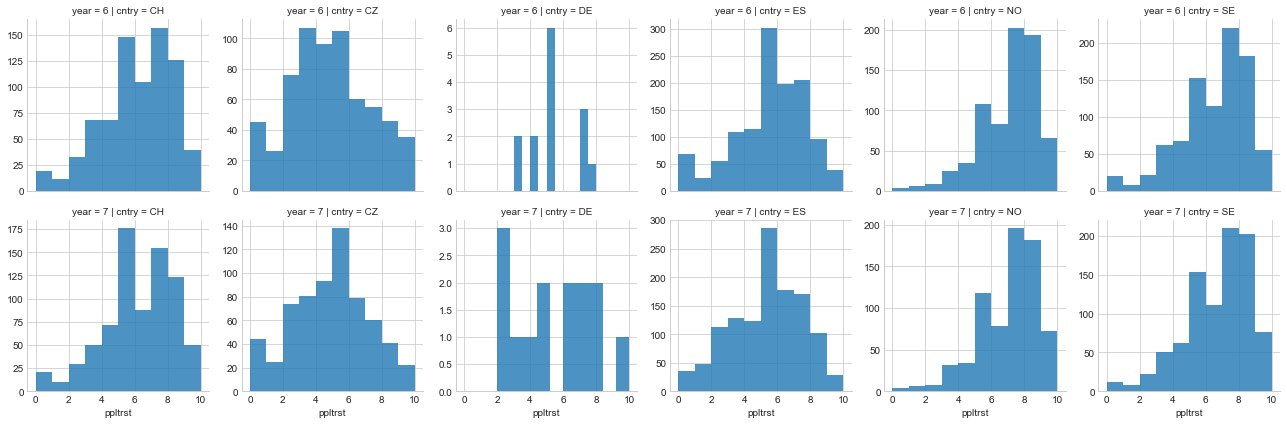

Shapiro Tests for Normality
CH 6 (0.9517108201980591, 9.511383786695374e-15)
CH 7 (0.9547930955886841, 2.4654701498145852e-14)

CZ 6 (0.9680074453353882, 3.6126571179018185e-10)
CZ 7 (0.9715775847434998, 1.8777941424019673e-09)

DE 6 (0.8929166197776794, 0.10693283379077911)
DE 7 (0.9425466060638428, 0.4519253373146057)

ES 6 (0.949491024017334, 1.6942651933374377e-19)
ES 7 (0.9663601517677307, 1.5275811452092943e-15)

NO 6 (0.9211018085479736, 8.881221102071063e-19)
NO 7 (0.9292040467262268, 7.928973676032161e-18)

SE 6 (0.9367397427558899, 1.2586250953636158e-18)
SE 7 (0.9376322627067566, 1.3852298444033788e-18)



In [10]:
# Plotting histograms of trust for each country for each year
g = sns.FacetGrid(ess_raw, row='year', col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'ppltrst', alpha=0.8)
# Adding a title
print('\t\tDistribution of Trust from 2012 to 2014 for Six European Countries')
plt.show()

# Testing each country and each year to determine if happiness is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_data.cntry.unique())
years = [6,7]
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_data[ess_data.cntry == cnt]
    for year in years:
        # Printing Shapiro test results
        print(cnt, year, shapiro(ess_temp[ess_temp.year == year].ppltrst))
    print()

All of the graphs look non normally distributed, but the results for the Shapiro test are close to 1 which means that the distributions are close enough to a normal distribution. The graphs that look closest to being normally distributed are Czech Republic 2012, and 2014, and Spain in 2014. Denmark looks non-normally distributed and the Shapiro test p-value fails at the 0.05 threshold. However, due to the small sample size, I cannot fully trust the results for Denmark.

Due to the results of Denmark not being reliable, I am forced to use non-parametric distribution tests. Since the comparison in this case is for the same group of people and the distributions are non-parametric, I will use the Wilcoxon sign-rank test to determine if theree are differences between the distributions over the year. 

In [15]:
# Wilcoxon Signed Rank Test for each country between years.
# Forced to use raw document because the sample sizes didn't match otherwise.
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_raw[ess_raw.cntry ==cnt]
    # Printing Shapiro test results
    print(cnt, wilcoxon(ess_temp[ess_temp.year == 6].ppltrst, 
                        y=ess_temp[ess_temp.year == 7].ppltrst))
    print()

# Also computing t-test statistic for Denmark
ess_DE = ess_raw[ess_raw.cntry =='DE']
print('\nDE t-test:', ttest_ind(ess_DE[ess_DE.year==6].ppltrst, 
                              ess_DE[ess_DE.year==7].ppltrst))

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

CZ WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

DE WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)

ES WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

NO WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

SE WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


DE t-test: Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)


/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2389: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


## Results

According to the Wilcoxon signed-rank test, the only statistical differences in trust in countries are Spain and Sweden since the p values pass the 0.05 threshold. All other countries fail that threshold so we fail to notice any statistical significance in the change of trust levels in their respective countries.

According to the histograms, trust has increased from 2012 to 2014 in Spain and Sweden.

# 2.  Did people become happier from 2012 to 2014? Compute results for each country in the sample.

Same thing as last time, in order to determine whether to use parametric or non parametric tests, I must first determine normality. 

		Distribution of Happiness from 2012 to 2014 for Six European Countries


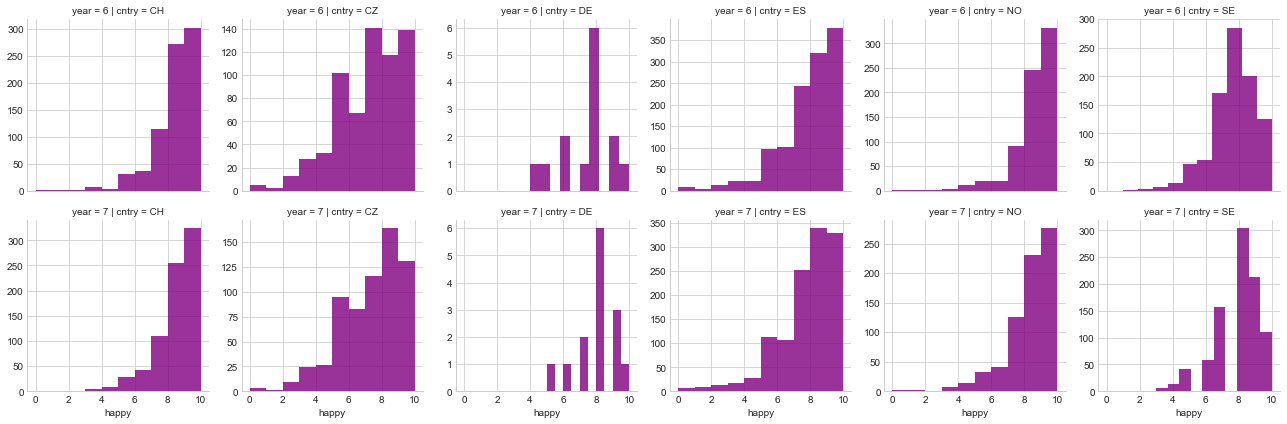

Shapiro Tests for Normality
CH 6 (0.8773602843284607, 1.4611401593361174e-23)
CH 7 (0.8950787782669067, 4.273768685964887e-22)

CZ 6 (0.9462587833404541, 5.939277796787254e-14)
CZ 7 (0.9448645710945129, 3.1643033327052525e-14)

DE 6 (0.9160983562469482, 0.22210942208766937)
DE 7 (0.9213663339614868, 0.23006466031074524)

ES 6 (0.9052610397338867, 3.4151276945678624e-26)
ES 7 (0.9136462211608887, 6.898763644671094e-25)

NO 6 (0.8498518466949463, 2.291937245544563e-25)
NO 7 (0.8795287609100342, 4.6808705797415216e-23)

SE 6 (0.9025380611419678, 5.918160728712866e-23)
SE 7 (0.912103533744812, 5.600742285549146e-22)



In [16]:
# Plotting histograms of happiness for each country for each year
g = sns.FacetGrid(ess_raw, row='year', col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'happy', alpha=0.8, color='purple')
# Adding a title
print('\t\tDistribution of Happiness from 2012 to 2014 for Six European Countries')
plt.show()

# Testing each country and each year to determine if happiness is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_data.cntry.unique())
years = [6,7]
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_data[ess_data.cntry ==cnt]
    for year in years:
        # Printing Shapiro test results
        print(cnt, year, shapiro(ess_temp[ess_temp.year ==year].happy))
    print()

At a glance, even without the Shapiro test, I can tell that this is definitely not a normal distribution. At a glance however, it does seem that people are becoming happier. Now that I think about it, as long I have to compare Denmark to its peers, I will always have to use a non parametric distribution test.

The Shapiro scores for each country are surprisingly high given how skewed the histograms are.

In [17]:
# Wilcoxon Signed Rank Test for each country between years.# Wilco 
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_raw[ess_raw.cntry ==cnt]
    # Printing Shapiro test results
    print(cnt, wilcoxon(ess_temp[ess_temp.year == 6].happy, y=ess_temp[ess_temp.year == 7].happy))
    print()
    
# Printing t-test statistic for Denmark
print('\nDE t-test:', ttest_ind(ess_DE[ess_DE.year==6].happy, 
                              ess_DE[ess_DE.year==7].happy))

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

CZ WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

DE WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

ES WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

NO WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

SE WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


DE t-test: Ttest_indResult(statistic=-0.7648529270389165, pvalue=0.451246041120838)


/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2389: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


## Analysis

According to the Wilcoxon test, only Spain and Norway have a statistical signifance in the difference of their happiness levels from 2012 to 2014. According to the histograms, Spain and Norway have become less happy from 2012 to 2014. As for the other four countries, the Wilcoxon test could not determine whether there is any statistical significance to the changes in the happiness levels in 2012 and 2014.

# 3. Who reported watching more TV in 2012, men or women?

For this question, we are not comparing the opinions of the same person over time, just men versus women, so these ratings are independent of one another, meaning I can use a t-test or Wilcoxon test to describe the distribution differences. Now, let's see whether or not these distributions are normally distributed so we can figure out which one to use.

In [18]:
# Create a dataframe for 2012.
ess_2012 = ess_raw[ess_raw.year==6]

In [20]:
# Check the sample size for each gender.
ess_2012['gndr'].value_counts()

1.0    2154
2.0    2143
Name: gndr, dtype: int64

In [22]:
# Too lazy to calculate the count total. 
len(ess_2012)

4297

		Distribution of Total TV Watching in 2012 for Men and Women


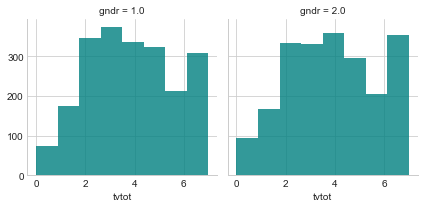

Males (1.0): (0.9434293508529663, 5.994494507539187e-28)
Females (2.0): (0.9390434622764587, 8.488309331265169e-29)


In [39]:
g = sns.FacetGrid(ess_2012, col='gndr', dropna=True, sharey=True)
g = g.map(plt.hist, 'tvtot', alpha=0.8, color='teal', bins=8)
# Adding a title
print('\t\tDistribution of Total TV Watching in 2012 for Men and Women')
plt.show()

print('Males (1.0):', shapiro(ess_2012[ess_2012.gndr ==1].tvtot.dropna()))
print('Females (2.0):', shapiro(ess_2012[ess_2012.gndr ==2].tvtot.dropna()))

According to the Shapiro test, this is a normal distribution, but in my opinion, it seems more like a non-normal distribution so I'm going to use a non-parametric distribution test. 

In [24]:
# Printing Wilcoxon Test for TV watching across genders.  Using only first 2140 entries of men to even counts.
print('Wilcoxon Test:', wilcoxon(ess_2012[ess_2012.gndr == 1].tvtot.dropna()[:2140], 
                                 y=ess_2012[ess_2012.gndr == 2].tvtot.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=782530.0, pvalue=0.5033507782372963)


## Analysis

There is no statistical significance in the tv viewership of males and females.

# 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Again, these people are all independent of one another, so I will need to use a t-test or a Wilcoxon test to determine if the distributions are different from one another. Let's now check for normality to determine which one to use.

		Distribution of Fairness in 2012 for People who Live with and without a Partner


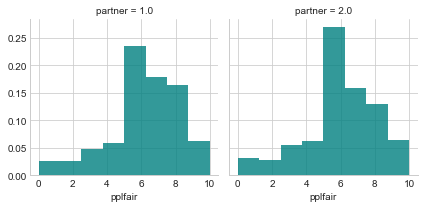

Lives with Partner (1.0): (0.94523686170578, 2.068099309311279e-30)
Lives Alone (2.0): (0.9332861304283142, 2.8958550733254737e-26)


In [40]:
g = sns.FacetGrid(ess_2012, col='partner', dropna=True, sharey=True)
g = g.map(plt.hist, 'pplfair', alpha=0.8, color='teal', bins=8, normed=True)
# Adding a title
print('\t\tDistribution of Fairness in 2012 for People who Live with and without a Partner')
plt.show()

print('Lives with Partner (1.0):', shapiro(ess_2012[ess_2012.partner ==1].tvtot.dropna()))
print('Lives Alone (2.0):', shapiro(ess_2012[ess_2012.partner ==2].tvtot.dropna()))

According to the Shapiro test, it is likely that this is a normal distribution but the graph tells me that the distributions are slightly skewed.

In [26]:
ess_2012['partner'].value_counts()

1.0    2674
2.0    1616
Name: partner, dtype: int64

In [28]:
# Printing Wilcoxon Test for fairness across living with and without partners.  
# Using only first 1608 entries of living with partners to even counts.
print('Wilcoxon Test:', wilcoxon(ess_2012[ess_2012.partner == 1].pplfair.dropna()[:1608], 
                                 y=ess_2012[ess_2012.partner == 2].pplfair.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=426739.0, pvalue=0.004340158276254172)


According to the Wilcoxon test, there is a statistical significance in the difference between single people and couples in terms of how much they believe in the fairness of people. From just eyeballing the histograms, it looks like couples are more likely to believe that people are fair. 

In [30]:
print('Median Fairness for People living with Partners:', ess_2012[ess_2012.partner == 1].pplfair.median())
print('Median Fairness for People living Alone:', ess_2012[ess_2012.partner == 2].pplfair.median())

print('\nLooks like my eyeball estimation was correct.')

Median Fairness for People living with Partners: 7.0
Median Fairness for People living Alone: 6.0

Looks like my eyeball estimation was correct.


# Question 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Since I will be choosing 3 or 4 countries, and knowing these countries are independent of one another, I will either be using a one-way or Mood’s median test or Kruskal-Wallis test, depending on the distribution of the data, so let's check it out.

Let's use the Czech Republic, Spain, Norway, and Sweden as our countries.

In [31]:
# Pulling out the countries in 2014
country_list = ['CZ','ES','NO','SE']
ess_c = ess_raw[(ess_raw.cntry.isin(country_list)) & (ess_raw.year == 7)]

		Distribution of Social Meetings from 2014 for Four European Countries


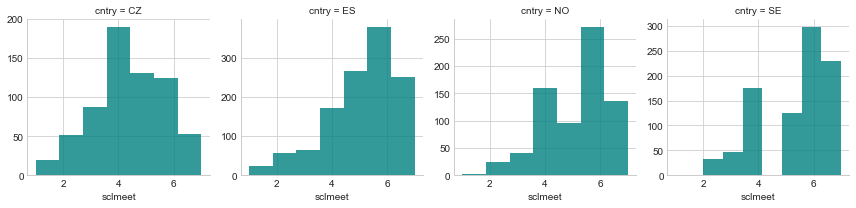

Shapiro Tests for Normality
CZ (0.9451602101325989, 7.663770300607355e-15)

ES (0.8880351781845093, 9.848293928138278e-29)

NO (0.8881818056106567, 1.422473605641294e-22)

SE (0.8798282146453857, 6.682967662559975e-26)



In [38]:
# Plotting histograms of happiness for each country for each year
g = sns.FacetGrid(ess_c, col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'sclmeet', alpha=0.8, color='teal', bins=7)
# Adding a title
print('\t\tDistribution of Social Meetings from 2014 for Four European Countries')
plt.show()

# Testing each country and each year to determine if happiness is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_c.cntry.unique())
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    print(cnt, shapiro(ess_c[ess_c.cntry ==cnt].sclmeet.dropna()))
    # Printing Shapiro test results
    print()

According to the Shapiro test, it stats that they are all likely to be normal distributions but the distributions all look slightly skewed besides the Czech Republic which looks almost like a normal distribution. 

I will have to use either use Mood's median test or the Kruskal-Wallis test, but I will use the latter since it does more than tell me whether data points are aboce or below the median.

In [33]:
# Printing Kruskal test statistic
print(kruskal(ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'ES'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))

KruskalResult(statistic=199.91509305978323, pvalue=4.400563536291911e-43)


There is a statistical significance in the differences of the social meetings for the four countries I have picked. I will run t-tests for all the distributions to see which ones are different.

In [34]:
# Printing all combinations of t-tests
print('CZ vs ES:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'ES'].sclmeet.dropna()))
print('CZ vs NO:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclmeet.dropna()))
print('CZ vs SE:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))
print('ES vs NO:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclmeet.dropna()))
print('ES vs SE:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))
print('NO vs SE:', ttest_ind(ess_c[ess_c.cntry == 'NO'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))

CZ vs ES: Ttest_indResult(statistic=-11.400026538179093, pvalue=3.7676844407353374e-29)
CZ vs NO: Ttest_indResult(statistic=-11.269186128577815, pvalue=3.0334022155191707e-28)
CZ vs SE: Ttest_indResult(statistic=-13.471687937687198, pvalue=3.252593934148172e-39)
ES vs NO: Ttest_indResult(statistic=-0.632916395870007, pvalue=0.5268628350318294)
ES vs SE: Ttest_indResult(statistic=-2.649547268580078, pvalue=0.00811992279651295)
NO vs SE: Ttest_indResult(statistic=-1.8305856428076237, pvalue=0.06734412432597783)


According to the t-tests:

- Spain and Norway are not significantly different,
- Norway and Sweden are slightly different from one another but fails at the .05 threshold,
- Czech Republic is significantly different from Spain, Norway, and Sweden,
- Spain and Sweden are significantly different from one another.

This means that Czech Republic is a standout country, with fewer social meetings with others than most other countries since the values for the statistics are all negative.

# Question 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

Since I will be choosing 3 or 4 countries, and knowing these countries are independent of one another, I will either be using a one-way or Kruskal-Wallis test, depending on the distribution of the data, so let's check it out.

I will continue to use the same countries as in question 5.

		***Distribution of Social Activities from 2014 for Four European Countries***


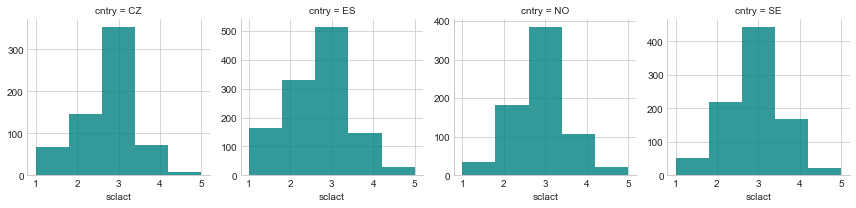

Shapiro Tests for Normality
CZ (0.8517600893974304, 3.2631608025549396e-24)

ES (0.892457902431488, 5.746904176126056e-28)

NO (0.8678725957870483, 2.398206966061988e-24)

SE (0.8822488784790039, 1.283228571387991e-25)



In [35]:
# Plotting histograms of happiness for each country for each year
g = sns.FacetGrid(ess_c, col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'sclact', alpha=0.8, color='teal', bins=5)
# Adding a title
print('\t\t***Distribution of Social Activities from 2014 for Four European Countries***')
plt.show()

# Testing each country and each year to determine if happiness is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_c.cntry.unique())
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Printing Shapiro test results
    print(cnt, shapiro(ess_c[ess_c.cntry ==cnt].sclact.dropna()))
    print()

According to the Shapiro test, all of these distributions look fairly normal and they do, but they aren't perfectly normal, so I will non parametric test once again, the Kruskal-Wallis test to be exact. 

In [36]:
# Printing Kruskal test statistic
print(kruskal(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'ES'].sclact.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))

KruskalResult(statistic=53.809701709377876, pvalue=1.2319673584021775e-11)



Based on the Kruskal test, I know that the distributions of social activities are statistically different from one another. To determine which are different, I need to run t-tests for all distributions against each other.

In [37]:
# Printing all combinations of t-tests
print('CZ vs ES:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'ES'].sclact.dropna()))
print('CZ vs NO:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclact.dropna()))
print('CZ vs SE:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))
print('ES vs NO:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclact.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclact.dropna()))
print('ES vs SE:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))
print('NO vs SE:', ttest_ind(ess_c[ess_c.cntry == 'NO'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))

CZ vs ES: Ttest_indResult(statistic=1.9231457887987455, pvalue=0.05461649785517343)
CZ vs NO: Ttest_indResult(statistic=-3.44673561169421, pvalue=0.0005844634540645623)
CZ vs SE: Ttest_indResult(statistic=-4.0018841917465595, pvalue=6.580214302799725e-05)
ES vs NO: Ttest_indResult(statistic=-5.671149129663532, pvalue=1.6345881270312057e-08)
ES vs SE: Ttest_indResult(statistic=-6.500257345866597, pvalue=1.000080729987386e-10)
NO vs SE: Ttest_indResult(statistic=-0.4823216270234106, pvalue=0.6296421272017451)



According to the t-tests:

- Norway and Sweden are not significantly different,
- Czech Republic and Spain are slightly different from one another,
- Czech Republic is significantly different from Sweden and Norway,
- Spain is significantly different from Sweden, and Norway.

This means that Czech Republic and Spain are the standouts as for social activities, with both having fewer social activities than most.